# Clustering Preprocessing
Users are clustered based on the genres of the movies they watched (rated). To get this information, the following is done:   
1. Extract genres from <i>genres</i> column in the movie metadata (json to one hot encoding)
2. merge user ratings and movie metadata
3. group user ratings so only one entry per user is retained
4. normalize genre values so the sum equals 1 for each user 
5. discard unneeded columns
6. for visualization purposes: transform data to two dimensions 

Step 1 is already performed in the prediction preprocessing.

In [1]:
# change used width of browser window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# import packages
import pandas as pd
import re
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.interpolate import interpn

from sklearn.manifold import TSNE as TSNE
from sklearn.decomposition import PCA

## 1. Load Data

In [3]:
# Load Preprocessed Movie Metadata
df_movies = pd.read_csv("clusterPreprocessing.csv")
display(df_movies.head(3))
# load user ratings
df_ratings = pd.read_csv("the-movies-dataset/ratings.csv")
df_ratings = df_ratings.drop(columns=["rating", "timestamp"])
display(df_ratings.head(3))

,Mystery,Foreign,History,TV Movie,Crime,Family,Music,Documentary,Action,Fantasy,...,Thriller,Science Fiction,Drama,Adventure,Romance,Horror,Comedy,Western,imdbId,rating
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,114709,3.888157
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,113497,3.236953
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,113228,3.175550


,userId,movieId
0,1,110
1,1,147
2,1,858


## 2. Merge User Ratings and Movie Metadata 

In [4]:
# join ratings and metadata
df_joined = pd.merge(left=df_ratings,right=df_movies, left_on='movieId', right_on='imdbId')
 
# discard unneeded columns (all except userId and genres)
df_joined = df_joined.drop(columns=["movieId", "imdbId", "rating"])

# group values per user and aggregate genres
df_joined = df_joined.groupby("userId").sum()

# normalize genre values
df_joined = df_joined.div(df_joined.sum(axis=1), axis=0)
df_joined = df_joined.fillna(0)

display(df_joined.head(5))

,Mystery,Foreign,History,TV Movie,Crime,Family,Music,Documentary,Action,Fantasy,War,Animation,Thriller,Science Fiction,Drama,Adventure,Romance,Horror,Comedy,Western
userId,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.00,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.00,0.00,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.00,0.00,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.0
7,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.00,0.166667,0.00,0.00,0.166667,0.0,0.0,0.166667,0.166667,0.0,0.0,0.166667,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.25,0.000000,0.25,0.25,0.000000,0.0,0.0,0.250000,0.000000,0.0,0.0,0.000000,0.0


In [5]:
# export clustering data as csv
df_joined.to_csv("userclusterdata.csv", index=True)

## 3. Transform Data 
Transform multidimensional data into two dimensions to be able to plot it. This transformed data can be used to evaluate the clusters visually to some extent.

In [6]:
# pca: principal component analysis
a_pca = PCA(n_components=2).fit_transform(df_joined)

# tsne: t-distributed stochastic neighbor embedding
a_tsne = TSNE(n_components=2).fit_transform(df_joined)

In [7]:
# # export transformed data as csv file
np.savetxt("tsne_allgenres.csv", a_tsne, delimiter=",")
np.savetxt("pca_allgenres.csv", a_pca, delimiter=",")

## 4. Explore Clustering data
### 4.1 Genre Distribution
How are the percentages of genres distributed?

In [8]:
df_joined.describe()

,Mystery,Foreign,History,TV Movie,Crime,Family,Music,Documentary,Action,Fantasy,War,Animation,Thriller,Science Fiction,Drama,Adventure,Romance,Horror,Comedy,Western
count,179909.000000,179909.000000,179909.000000,179909.000000,179909.000000,179909.000000,179909.000000,179909.000000,179909.000000,179909.000000,179909.000000,179909.000000,179909.000000,179909.000000,179909.000000,179909.000000,179909.000000,179909.000000,179909.000000,179909.000000
mean,0.013305,0.002140,0.006249,0.000989,0.024948,0.007890,0.015973,0.207347,0.031069,0.049161,0.031862,0.059083,0.028189,0.031701,0.215376,0.025829,0.025126,0.033480,0.127955,0.017398
std,0.044663,0.017274,0.035292,0.010507,0.066796,0.036863,0.065845,0.320403,0.067733,0.138575,0.077115,0.147798,0.063577,0.071477,0.238840,0.065426,0.065315,0.087143,0.202744,0.076983
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.043478,0.024911,0.027027,0.045455,0.000000,0.038462,0.333333,0.000000,0.000000,0.027778,0.181818,0.000000
max,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# seaborn settings
sb.set(rc={'figure.figsize':(40,10)})
sb.set(font_scale=1.5)

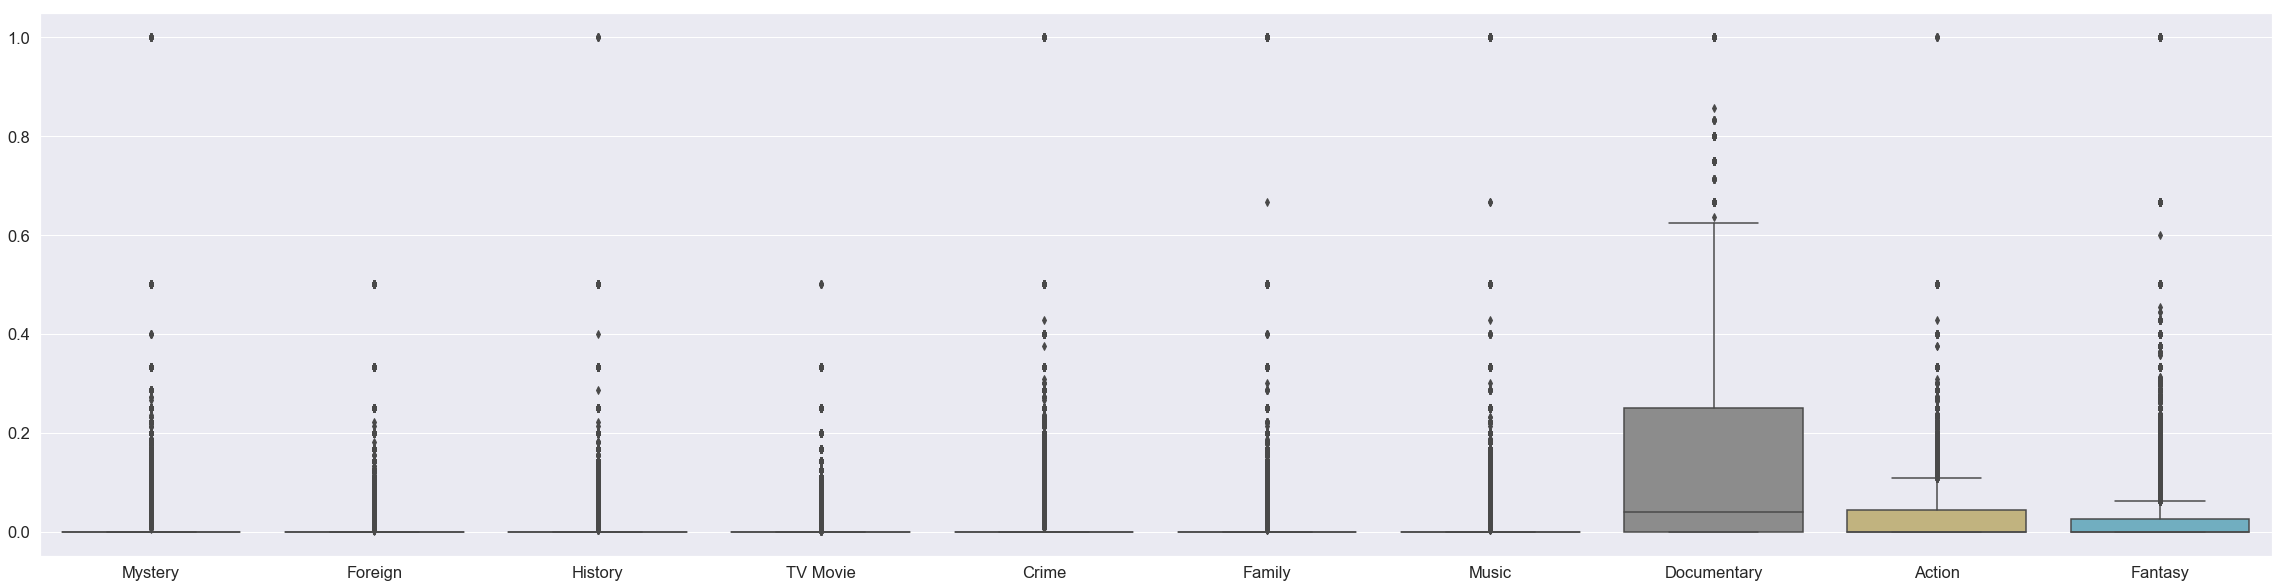

In [10]:
sb.boxplot(data=df_joined[list(df_joined)[:10]])

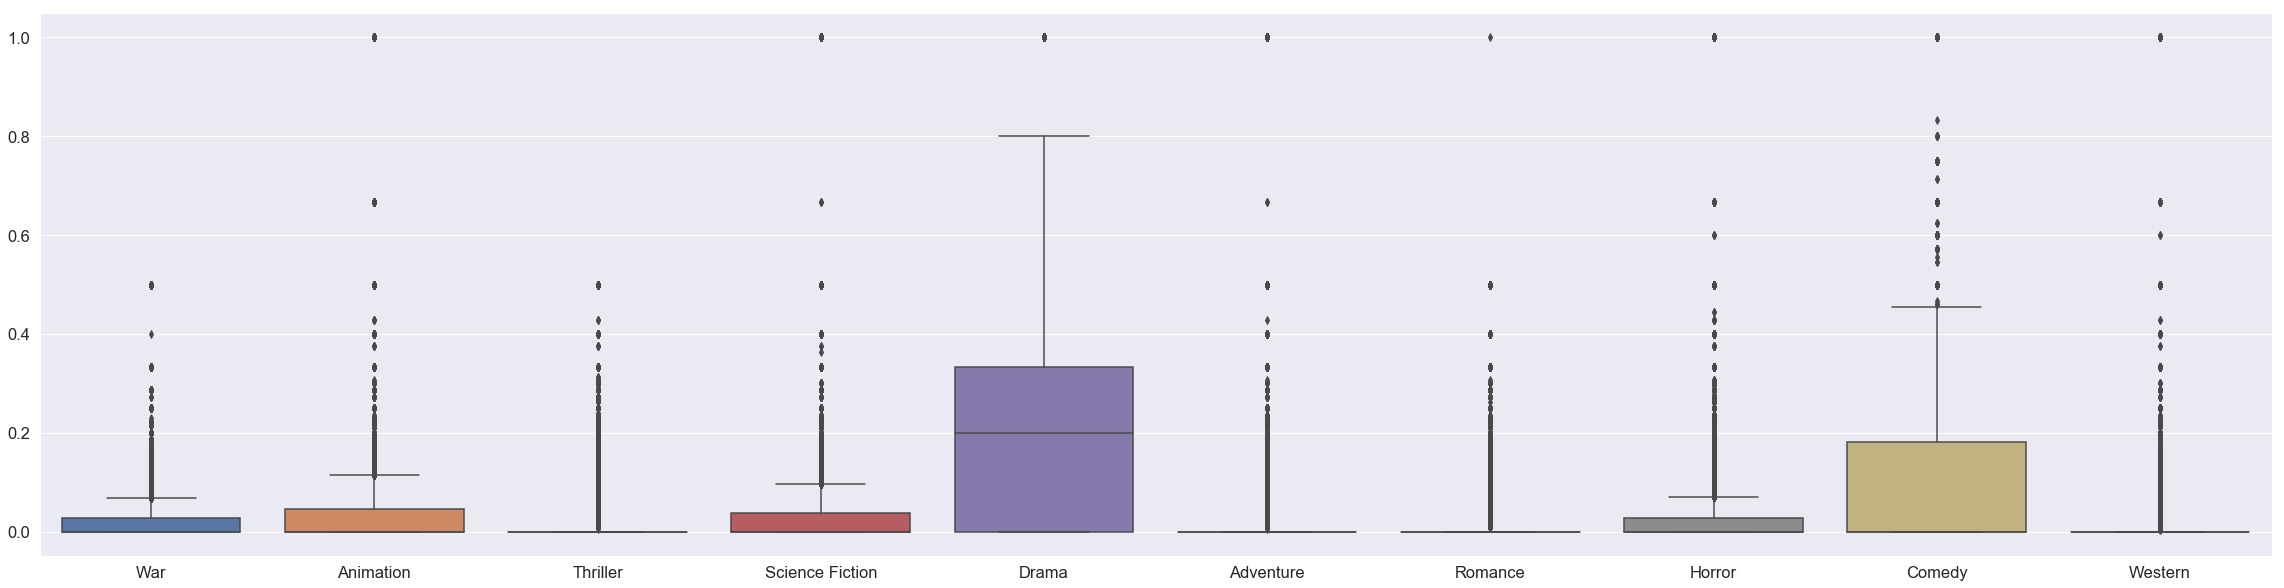

In [11]:
sb.boxplot(data=df_joined[list(df_joined)[10:]])

<b>Insights:</b> 
- Some genres are a lot more popular, especially Drama, Documentary and Comedy.
- There are some genres that are never the only genre a user watched: Thriller, Foreign, War, TV Movie
- For all other genres there are users that only watched movies with the same genre

### 4.2 Transformed Data

In [12]:
# seaborn settings
sb.set(rc={'figure.figsize':(20,10)})
sb.set(font_scale=1.5)

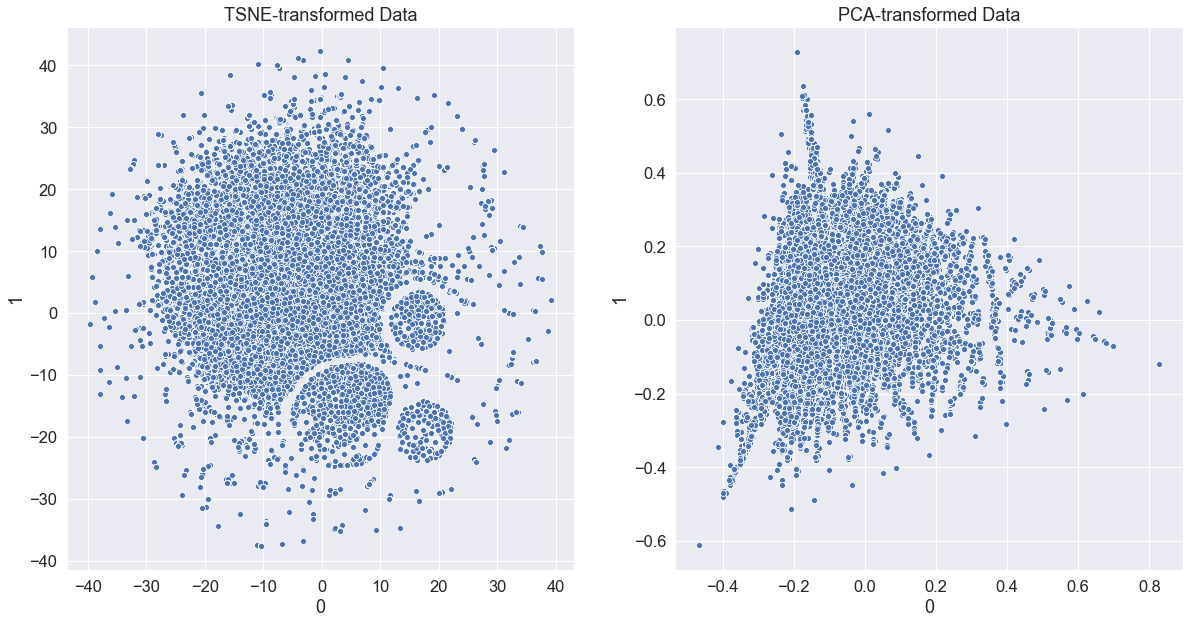

In [13]:
# create t-sne and pca scatter plot
f, axes = plt.subplots(1, 2)
plot1 = sb.scatterplot( x=df_tsne[0], y=df_tsne[1],  ax=axes[0])
plot1.set(title="TSNE-transformed Data")
plot2 = sb.scatterplot( x=df_pca[0], y=df_pca[1],  ax=axes[1])
plot2.set(title="PCA-transformed Data")
plt.show()

The scatter plot is very dense and is therefore repeated with density as an additional dimension.

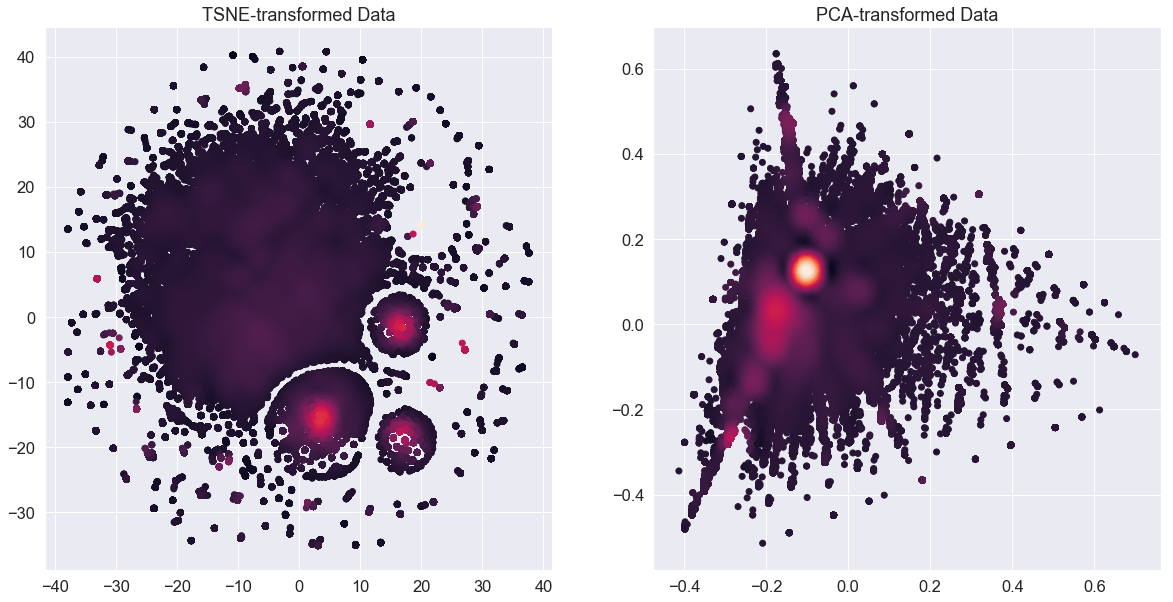

In [14]:
# plot with density
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins)
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False )

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )
    return ax

f, axes = plt.subplots(1, 2)
plot1 = density_scatter( df_tsne[0], df_tsne[1], bins = [30,30], ax=axes[0])
plot1.set(title="TSNE-transformed Data")
plot2 = density_scatter( df_pca[0], df_pca[1], bins = [30,30], ax=axes[1])
plot2.set(title="PCA-transformed Data")
plt.show()

The t-sne transformation appears to segregate the data better, at least three smaller clusters and a larger cluster are visible. Additionally there are some heat points with many points on the same position, which appeared to be outliers in the plot without density but are actually none. 